In [ ]:
!pip3 install catboost

     |████████████████████████████████| 76.6 MB 1.7 MB/s 


In [ ]:
from sklearn.metrics import r2_score, f1_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.datasets as datasets
from sklearn.tree import plot_tree

import catboost as cb
import xgboost as xg

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ensemble.RandomForestClassifier()

RandomForestClassifier()

В качестве задачи к данному занятию будет рассмотрена задача классификации рукописных цифр из встроенной таблицы данных MNIST в google.colab

In [ ]:
data_train_classifier = pd.read_csv("/content/sample_data/mnist_train_small.csv")
data_test_classifier = pd.read_csv("/content/sample_data/mnist_test.csv")

In [ ]:
data_train_classifier.shape

(19999, 785)

In [ ]:
data_test_classifier.shape

(9999, 785)

In [ ]:
X_train = data_train_classifier.iloc[:, 1:]
Y_train = data_train_classifier.iloc[:, 0]
X_test = data_test_classifier.iloc[:, 1:]
Y_test = data_test_classifier.iloc[:, 0]

In [ ]:
Y_train.unique()

array([5, 7, 9, 2, 0, 6, 8, 3, 4, 1])

In [ ]:
Y_test.unique()

array([2, 1, 0, 4, 9, 5, 6, 7, 3, 8])

In [ ]:
X_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.iloc[:, 100].unique()

array([  0, 246,  63, 175, 254,  30,   2, 118, 100, 128,  31,  17, 221,
       233, 126, 255, 105, 182, 165, 205, 231, 125,  87,  86, 253, 214,
       119, 203,   4,  84, 139, 215,  76, 187, 236,  57, 226,  79, 229,
       252, 200,  77,  11,  92,  54, 109, 102,  22,  49,  97, 178, 154,
       213, 157,   8, 130, 166, 138, 250,  82, 193, 155, 123,  29, 227,
        26, 156, 153,  51, 247, 245,  42, 160, 244, 142,  27,  24,  21,
       167, 238,  64, 168, 191,  61,  47, 164,  85, 145,  67, 206, 240,
       249, 137,  23,   3,  89, 132, 136,  60,  25,  71, 131, 185, 170,
       180, 111, 209, 207,  39,  37, 184, 114, 190,  65, 212, 211, 234,
       135, 152,  52, 188, 158, 159, 117, 204, 113,   9,  14,  53,  19,
       218, 186,  28,  18, 197,  33, 235, 176, 174,  70, 172,  98, 179,
        10, 149, 148,  15,  12, 133, 230,  38, 242, 192,  50, 196,   6,
         7, 140,  83,  44, 169,  13, 141, 237, 129,  36,  68,  40, 219,
       183, 216,  66, 106, 144, 222,  16,  34, 241,  93, 239,  4

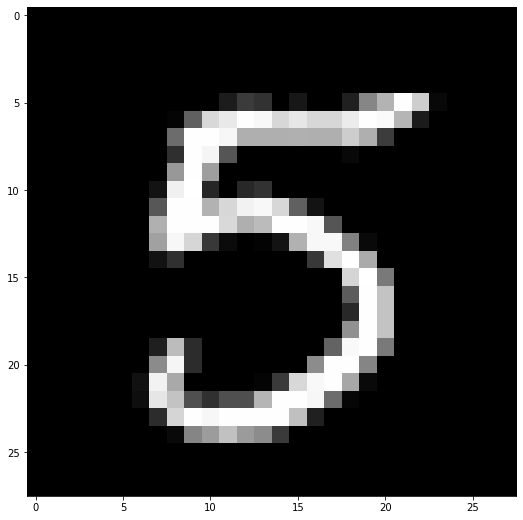

In [ ]:
plt.figure(figsize=(9, 9))
plt.imshow(np.array(X_train.iloc[0, :]).reshape((28, 28)),
           cmap = "gray")

# **Классификация**

## **Дерево решений**

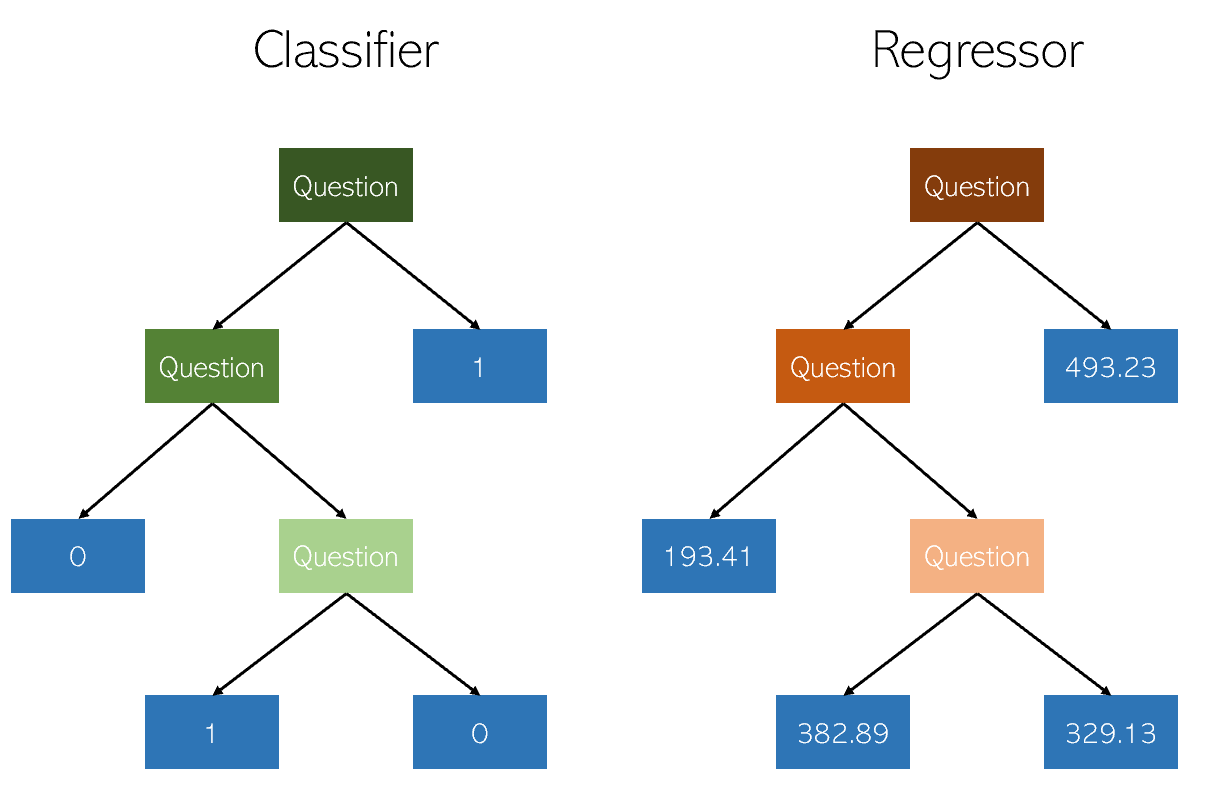

In [ ]:
model_DT_clf = tree.DecisionTreeClassifier()#max_depth=15, min_samples_leaf=4 критерии останова
model_DT_clf.fit(np.array(X_train), np.array(Y_train))

DecisionTreeClassifier(max_depth=15, min_samples_leaf=5)

[Text(0.5, 0.9, 'X[409] <= 0.5\ngini = 0.9\nsamples = 19999\nvalue = [1962, 2243, 1989, 2021, 1924, 1761, 2038, 2126, 1912\n2023]'),
 Text(0.25, 0.7, 'X[434] <= 0.5\ngini = 0.815\nsamples = 6628\nvalue = [1641, 1989, 553, 411, 116, 753, 375, 196, 502, 92]'),
 Text(0.125, 0.5, 'X[455] <= 0.5\ngini = 0.562\nsamples = 2497\nvalue = [1611, 5, 135, 152, 29, 238, 150, 126, 19, 32]'),
 Text(0.0625, 0.3, 'X[352] <= 2.5\ngini = 0.827\nsamples = 839\nvalue = [197, 5, 75, 137, 7, 195, 107, 95, 15, 6]'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'X[489] <= 95.5\ngini = 0.269\nsamples = 1658\nvalue = [1414, 0, 60, 15, 22, 43, 43, 31, 4, 26]'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'X[375] <= 0.5\ngini = 0.722\nsamples = 4131\nvalue = [30, 1984, 418, 259, 87, 515, 225, 70, 483, 60]'),
 Text(0.3125, 0.3, 'X[550] <= 2.5\ngini = 0.502\nsamples = 2722\nvalue = [9, 1881, 324, 87, 42, 79, 85, 67, 1

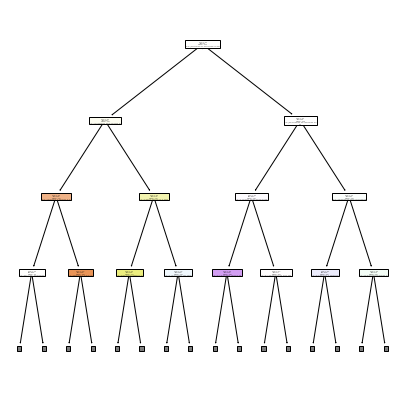

In [ ]:
plt.figure(figsize = (7,7))
plot_tree(model_DT_clf,filled=True,max_depth=3)

In [ ]:
preds_DT_clf = model_DT_clf.predict(np.array(X_test))

In [ ]:
preds_train_DT_clf = model_DT_clf.predict(X_train)
print(classification_report(Y_train, preds_train_DT_clf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1962
           1       0.96      0.98      0.97      2243
           2       0.89      0.93      0.91      1989
           3       0.91      0.91      0.91      2021
           4       0.93      0.92      0.92      1924
           5       0.90      0.90      0.90      1761
           6       0.96      0.93      0.95      2038
           7       0.94      0.95      0.95      2126
           8       0.92      0.90      0.91      1912
           9       0.92      0.92      0.92      2023

    accuracy                           0.93     19999
   macro avg       0.93      0.93      0.93     19999
weighted avg       0.93      0.93      0.93     19999



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
model_DT_clf.get_depth()

15

In [ ]:
model_DT_clf.get_n_leaves()

823

In [ ]:
print(confusion_matrix(Y_test, preds_DT_clf))

[[ 908    0   16    5    7   14   10    9    8    3]
 [   1 1071   13    8    5    0    5    7   22    3]
 [  23   19  853   24   10   12   14   35   33    9]
 [  19    6   42  802    8   56    7   21   26   23]
 [   4   11   18   10  825   12    8    5   27   62]
 [  23    8   18   62   18  682   26   17   16   22]
 [  29    8   37   11   19   26  801    5   16    6]
 [   4   11   19   20   11    5    3  919    6   29]
 [  19   14   52   27   26   38   18   20  733   27]
 [  13    4   13   21   34   15    7   27   38  837]]


In [ ]:
print(f1_score(Y_train, preds_train_DT_clf, average="macro"))
print(f1_score(Y_test, preds_DT_clf, average="macro"))

0.9294174637435899
0.8408408238928915


Model DT thinks this is number  [8]


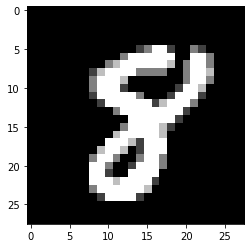

In [ ]:
# Число отвечает за то, какая строка из таблицы данных будет выдана в модель
# 0 и до 9998
num_of_test_row = 5002

sample_number_from_test = np.array(X_test.iloc[num_of_test_row, :]).reshape(1, -1)

pred_test = model_DT_clf.predict(sample_number_from_test)

plt.imshow(np.array(X_test.iloc[num_of_test_row, :]).reshape((28, 28)), 
           cmap="gray")

print("Model DT thinks this is number ", pred_test)

In [ ]:
# Установленные параметры для обучения дерева
print(model_DT_clf.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
# Количество листьев и глубина дерева
print(model_DT_clf.get_n_leaves())
print(model_DT_clf.get_depth())

823
15


In [ ]:
model_DT_gscv = tree.DecisionTreeClassifier()#новый классификатор
params_grid = {
    "ccp_alpha": [0.0],
    "class_weight": [None],
    "criterion": ['gini'],
    "max_depth": [12, 15, 18],
    "max_features": [None],
    "max_leaf_nodes": [None],
    "min_impurity_decrease": [0.0],
    "min_samples_leaf": [1, 5, 10],
    "min_samples_split": [2, 12, 22], #минимум примеров с вершине, при котором можно продолжить деление
    'min_weight_fraction_leaf': [0.0], 
    'random_state': [None], 
    'splitter': ['best']
    }

grid_search_DT_clf = GridSearchCV(estimator=model_DT_gscv, 
                                  param_grid=params_grid, 
                                  scoring="f1_macro", 
                                  cv = 4)

In [ ]:
grid_search_DT_clf.fit(np.array(X_train), np.array(Y_train))
preds_train = grid_search_DT_clf.predict(np.array(X_train))
print("Оценка классификации на обучении ", f1_score(Y_train, preds_train, average="macro"))

Оценка классификации на обучении  0.9648513721229047


In [ ]:
grid_search_DT_clf.best_estimator_

DecisionTreeClassifier(max_depth=12)

In [ ]:
preds_DT_gscv = grid_search_DT_clf.predict(np.array(X_test))

In [ ]:
f1_score(Y_test, preds_DT_gscv, average="macro")

0.8457684935031173

In [ ]:
print(tree.export_text(grid_search_DT_clf.best_estimator_))

|--- feature_409 <= 0.50
|   |--- feature_434 <= 0.50
|   |   |--- feature_455 <= 0.50
|   |   |   |--- feature_352 <= 2.50
|   |   |   |   |--- feature_518 <= 2.00
|   |   |   |   |   |--- feature_598 <= 8.00
|   |   |   |   |   |   |--- feature_182 <= 9.50
|   |   |   |   |   |   |   |--- feature_487 <= 2.00
|   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |--- feature_487 >  2.00
|   |   |   |   |   |   |   |   |--- feature_123 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_442 <= 102.50
|   |   |   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |   |   |--- feature_442 >  102.50
|   |   |   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |   |--- feature_123 >  3.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_182 >  9.50
|   |   |   |   |   |   |   |--- feature_243 <= 29.00
|   |   |   |   |   |   |   |   |--- feature_297 <= 18.50
|   |   |   |   |   |   |   | 

bagging

In [ ]:
def f(x):
  return 6 - 6*x + x**2 + 5*x**3

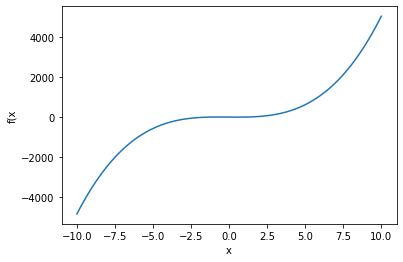

In [ ]:
x = np.linspace(-10,10,100)
y = f(x)
plt.xlabel('x')
plt.ylabel('f(x')
plt.plot(x,y)

In [ ]:
x_datasets = []
y_datasets = []

for i in range(10):
  xx = np.random.uniform(-10,10,30) #равномерно распределенные значение на интвервале от -10 до 10
  x_datasets.append(xx) 
  y_datasets.append([f(i) for i in xx] + np.random.uniform(-600,600,30)) #добавление шума к каждому y(xi)

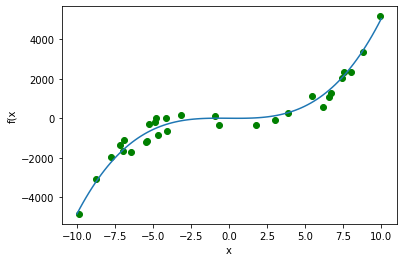

In [ ]:
plt.xlabel('x')
plt.ylabel('f(x')
plt.scatter(x_datasets[5],y_datasets[5], c = 'green')
plt.plot(x,y)
plt.show()

In [ ]:
#обучим на каждой подвыборке дерево решений

models = []
for i in range(10):
  model_tree = tree.DecisionTreeRegressor(max_depth=8, random_state=1)
  model_tree.fit(x_datasets[i].reshape(-1,1), y_datasets[i])
  models.append(model_tree)

In [ ]:
models

[DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1),
 DecisionTreeRegressor(max_depth=8, random_state=1)]

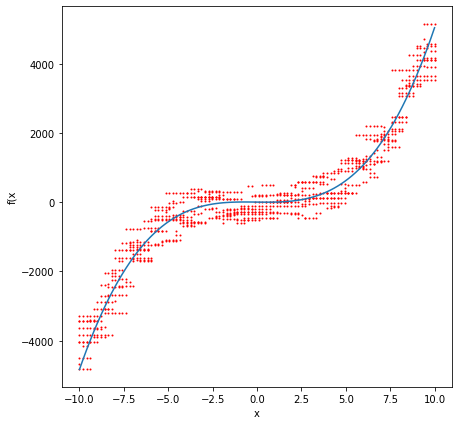

In [ ]:
plt.figure(figsize = (7,7))
preds = []
for i in range(10):
  pred = models[i].predict(x.reshape(-1,1))
  preds.append(pred)
  plt.scatter(x,pred,c='r', s = 1)
plt.xlabel('x')
plt.ylabel('f(x')
plt.plot(x,y)
plt.show()

preds=np.array(preds)

In [ ]:
mean_pred = preds.mean(axis=0)

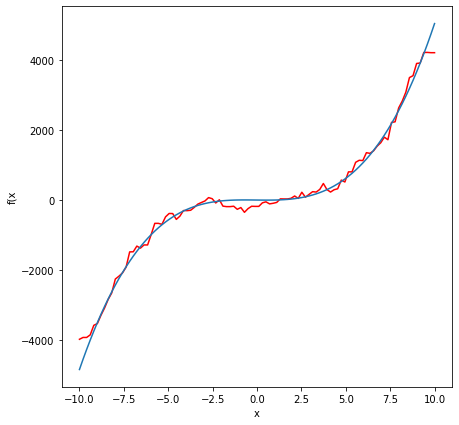

In [ ]:
plt.figure(figsize = (7,7))
plt.plot(x,mean_pred,c='r')
plt.xlabel('x')
plt.ylabel('f(x')
plt.plot(x,y)
plt.show()


## **Случайный лес**

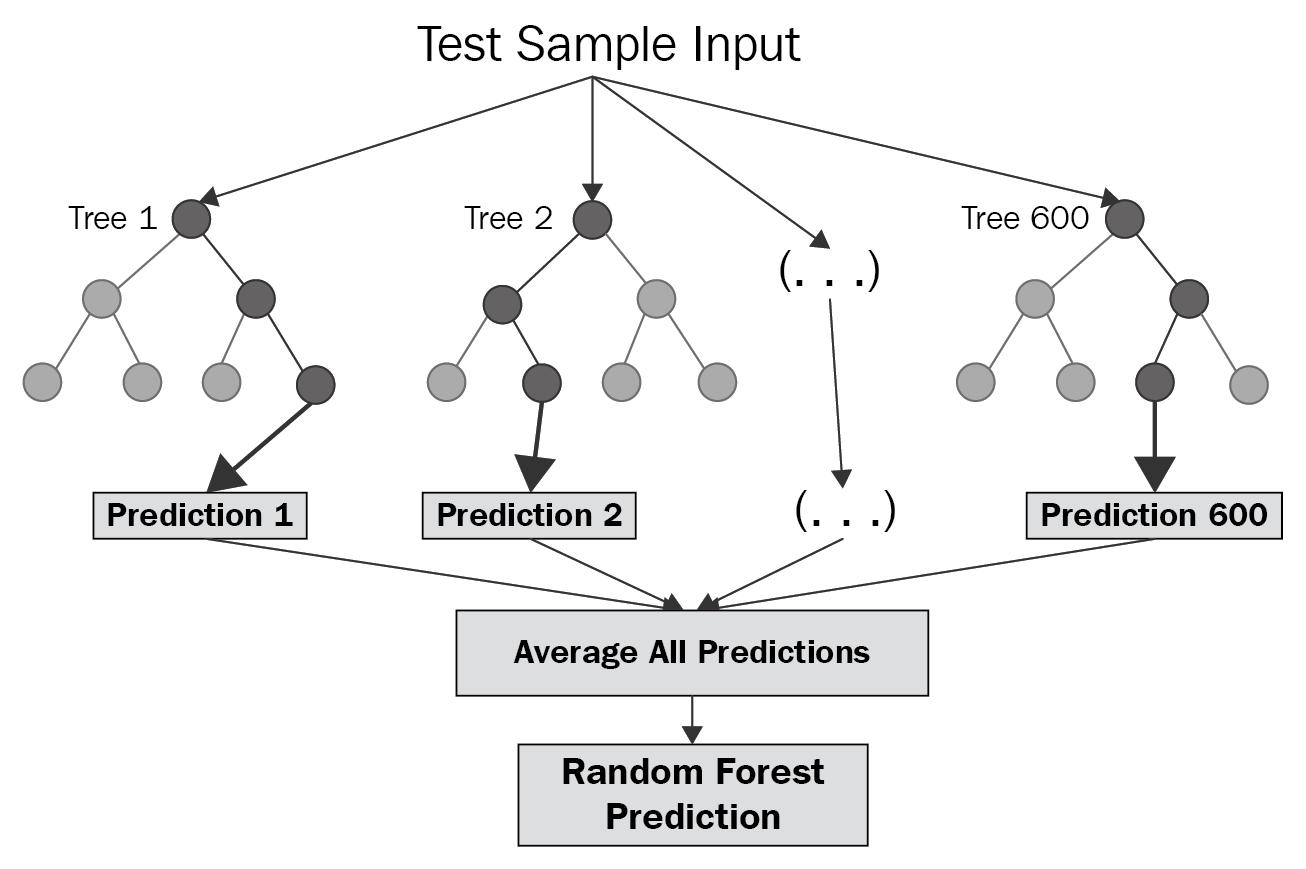

In [ ]:
model_RF_clf = ensemble.RandomForestClassifier()
model_RF_clf.fit(np.array(X_train), np.array(Y_train))
preds_RF_clf = model_RF_clf.predict(np.array(X_test))
print(confusion_matrix(Y_test, preds_RF_clf))

[[ 970    0    0    0    0    2    3    1    3    1]
 [   0 1121    3    3    0    2    3    0    2    1]
 [   7    0  988    7    5    0    5   12    7    1]
 [   2    0   15  957    0   13    1   10    9    3]
 [   2    0    3    0  949    0    5    1    3   19]
 [   7    2    0   16    4  840   10    2    6    5]
 [   8    3    0    0    4    4  936    0    3    0]
 [   1    8   24    3    3    0    0  970    2   16]
 [   6    0    6    9    8    5    8    5  912   15]
 [   6    6    4   11   14    8    2    4    5  949]]


In [ ]:
print(f1_score(Y_test, preds_RF_clf, average = "macro"))

0.9589076526015534


In [ ]:
model_RF_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## **Градиентный бустинг**



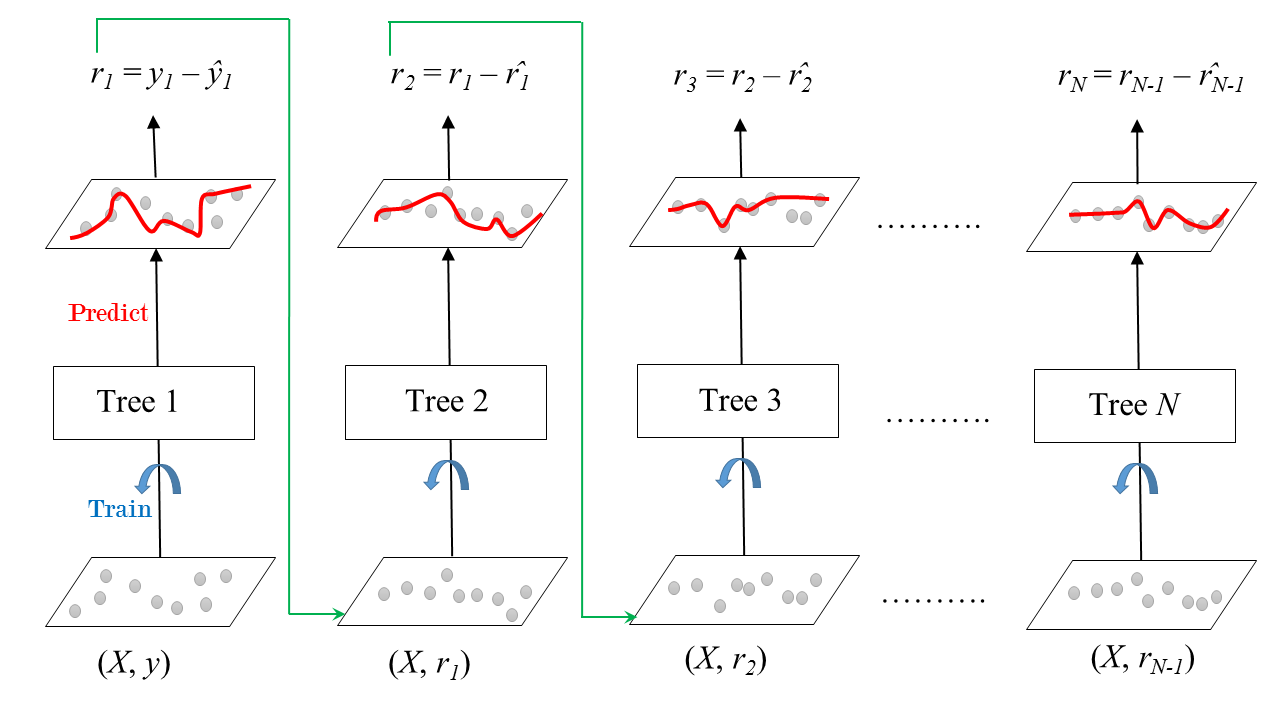

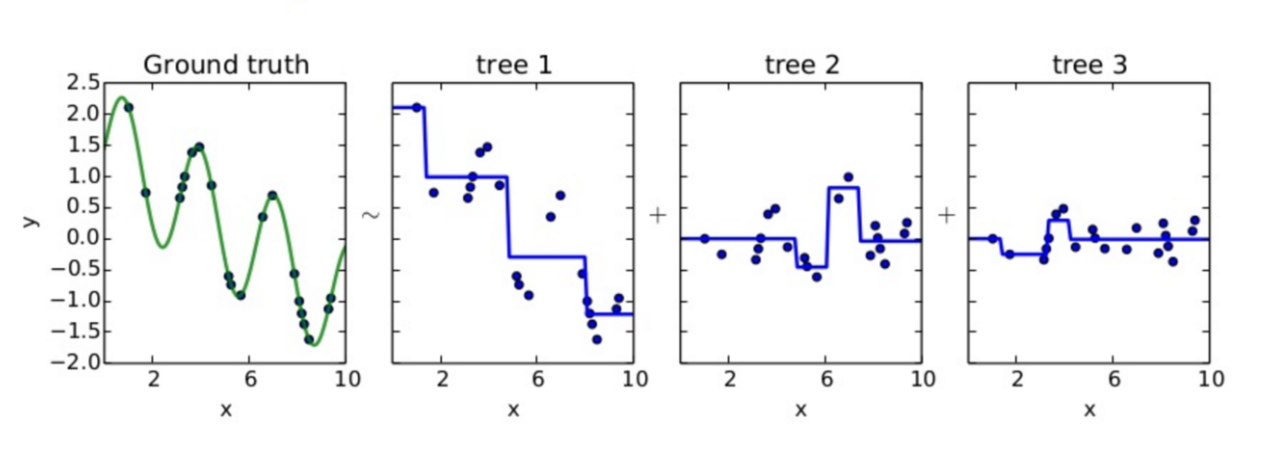

In [ ]:
model_catboost_clf = cb.CatBoostClassifier(iterations=2000,
                                           task_type="GPU",
                                           devices='0')
model_catboost_clf.fit(X_train, Y_train)

Learning rate set to 0.067132
0:	learn: 2.0934015	total: 85.4ms	remaining: 2m 50s
1:	learn: 1.9423973	total: 166ms	remaining: 2m 45s
2:	learn: 1.8070343	total: 244ms	remaining: 2m 42s
3:	learn: 1.7046708	total: 319ms	remaining: 2m 39s
4:	learn: 1.6068764	total: 396ms	remaining: 2m 38s
5:	learn: 1.5166194	total: 467ms	remaining: 2m 35s
6:	learn: 1.4413982	total: 537ms	remaining: 2m 32s
7:	learn: 1.3778847	total: 604ms	remaining: 2m 30s
8:	learn: 1.3222378	total: 665ms	remaining: 2m 27s
9:	learn: 1.2683997	total: 726ms	remaining: 2m 24s
10:	learn: 1.2132323	total: 792ms	remaining: 2m 23s
11:	learn: 1.1704411	total: 849ms	remaining: 2m 20s
12:	learn: 1.1298310	total: 908ms	remaining: 2m 18s
13:	learn: 1.0861419	total: 972ms	remaining: 2m 17s
14:	learn: 1.0527188	total: 1.04s	remaining: 2m 17s
15:	learn: 1.0147484	total: 1.1s	remaining: 2m 16s
16:	learn: 0.9776706	total: 1.16s	remaining: 2m 14s
17:	learn: 0.9457328	total: 1.21s	remaining: 2m 13s
18:	learn: 0.9158482	total: 1.27s	remaining:

In [ ]:
preds_catboost_clf = model_catboost_clf.predict(np.array(X_test), task_type="CPU")
print(confusion_matrix(Y_test, preds_catboost_clf))

[[ 968    0    1    1    0    3    4    1    2    0]
 [   0 1124    3    1    0    1    2    1    3    0]
 [   5    3  997    5    4    0    3    8    6    1]
 [   0    0    8  974    0   11    0   10    5    2]
 [   1    0    3    0  952    0    5    1    5   15]
 [   5    0    0    6    0  858   13    1    8    1]
 [   7    3    1    0    4    3  936    1    3    0]
 [   0    7   17    2    4    0    0  980    2   15]
 [   6    0    2    7    5    2    7    5  929   11]
 [   4    5    1   11    7    3    1    4    4  969]]


In [ ]:
print(f1_score(Y_test, preds_catboost_clf, average = "macro"))

0.9685629436434837


# **Регрессия**

## **Дерево решений**

In [ ]:
data_regression = pd.read_csv("/content/sample_data/california_housing_train.csv")
test_regression = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [ ]:
X_train = data_regression.iloc[:, :-1]
X_test = test_regression.iloc[:, :-1]
Y_train = data_regression.iloc[:, -1]
Y_test = test_regression.iloc[:, -1]

In [ ]:
Y_test

0       344700.0
1       176500.0
2       270500.0
3       330000.0
4        81700.0
          ...   
2995    225000.0
2996    237200.0
2997     62000.0
2998    162500.0
2999    500001.0
Name: median_house_value, Length: 3000, dtype: float64

In [ ]:
model_DT_regr = tree.DecisionTreeRegressor()
model_DT_regr.fit(X_train, Y_train)
preds_DT_regr = model_DT_regr.predict(X_test)
print(r2_score(Y_test, preds_DT_regr)) 

0.6451992442594048


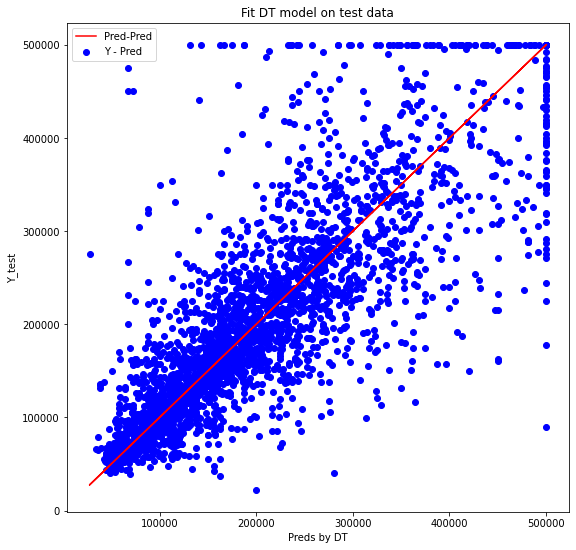

In [ ]:
plt.figure(figsize = (9, 9))
plt.plot(preds_DT_regr, preds_DT_regr, c="r", label = "Pred-Pred")
plt.scatter(preds_DT_regr, Y_test, c = "b", label = "Y - Pred")
plt.legend()
plt.title("Fit DT model on test data")
plt.xlabel("Preds by DT")
plt.ylabel("Y_test")
plt.show()

## **Случайный лес**

In [ ]:
model_RF_regr = ensemble.RandomForestRegressor(n_estimators=50)
model_RF_regr.fit(X_train, Y_train)
preds_RF_regr = model_RF_regr.predict(X_test)
print(r2_score(Y_test, preds_RF_regr)) 

0.8054781409667178


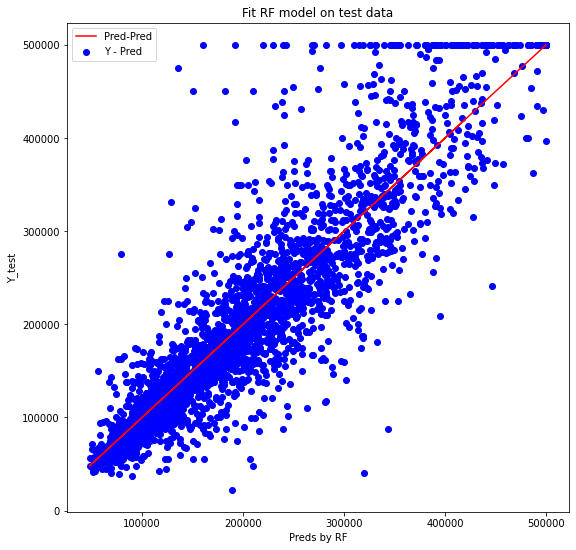

In [ ]:
plt.figure(figsize = (9, 9))
plt.plot(preds_RF_regr, preds_RF_regr, c="r", label = "Pred-Pred")
plt.scatter(preds_RF_regr, Y_test, c = "b", label = "Y - Pred")
plt.legend()
plt.title("Fit RF model on test data")
plt.xlabel("Preds by RF")
plt.ylabel("Y_test")
plt.show()

## **Градиентный бустинг**

In [ ]:
model_catboost_regr = cb.CatBoostRegressor(iterations=4000,
                                          task_type="GPU",
                                          devices='0', )
model_catboost_regr.fit(X_train, Y_train)

Learning rate set to 0.02559
0:	learn: 114462.6793689	total: 21.7ms	remaining: 1m 26s
1:	learn: 112922.4975515	total: 41.6ms	remaining: 1m 23s
2:	learn: 111464.5751729	total: 62ms	remaining: 1m 22s
3:	learn: 110046.8117937	total: 82.1ms	remaining: 1m 22s
4:	learn: 108737.0132086	total: 105ms	remaining: 1m 23s
5:	learn: 107380.7261109	total: 138ms	remaining: 1m 32s
6:	learn: 106089.3721864	total: 159ms	remaining: 1m 30s
7:	learn: 104870.4933250	total: 180ms	remaining: 1m 29s
8:	learn: 103678.2335292	total: 211ms	remaining: 1m 33s
9:	learn: 102567.6253239	total: 232ms	remaining: 1m 32s
10:	learn: 101482.6710848	total: 253ms	remaining: 1m 31s
11:	learn: 100412.6201922	total: 274ms	remaining: 1m 31s
12:	learn: 99371.9185865	total: 299ms	remaining: 1m 31s
13:	learn: 98372.7947517	total: 322ms	remaining: 1m 31s
14:	learn: 97429.2208938	total: 343ms	remaining: 1m 31s
15:	learn: 96525.3337670	total: 364ms	remaining: 1m 30s
16:	learn: 95628.6620799	total: 385ms	remaining: 1m 30s
17:	learn: 9474

In [ ]:
preds_catboost_regr = model_catboost_regr.predict(X_test)
print(r2_score(Y_test, preds_catboost_regr))

0.8204925658564763


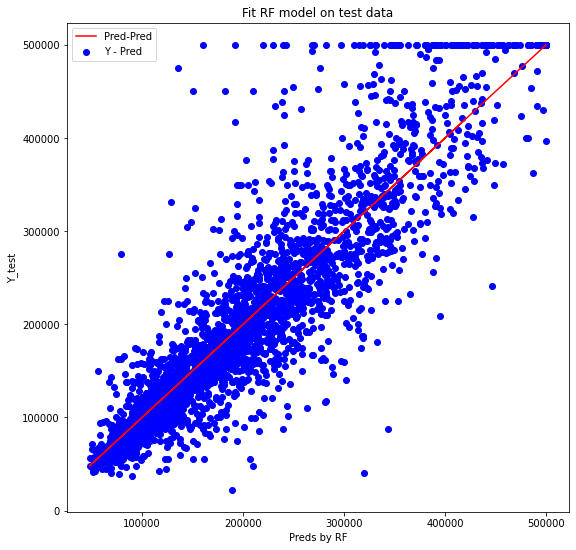

In [ ]:
plt.figure(figsize = (9, 9))
plt.plot(preds_RF_regr, preds_RF_regr, c="r", label = "Pred-Pred")
plt.scatter(preds_RF_regr, Y_test, c = "b", label = "Y - Pred")
plt.legend()
plt.title("Fit RF model on test data")
plt.xlabel("Preds by RF")
plt.ylabel("Y_test")
plt.show()